<a href="https://colab.research.google.com/github/rajan-dhinoja/Multiple_Disease_Prediction/blob/main/notebook_files/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Breast Cancer Prediction**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLASSIFICATION/Multiple_Diseases/breast_cancer.csv'))
dataset = pd.DataFrame(pd.read_csv('../datasets/breast_cancer.csv'))
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08


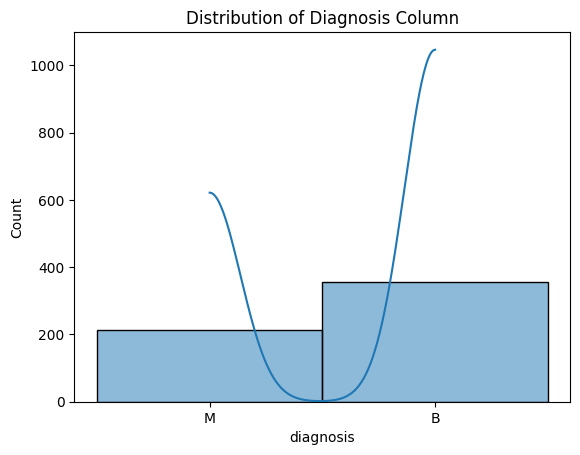

In [3]:
# plt.figure(figsize=(10, 6))
# Plot target distribution
sns.histplot(dataset['diagnosis'], bins=30, kde=True)
plt.title('Distribution of Diagnosis Column')
plt.show()

In [4]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

✅ Categorical Columns found: 
 Index(['diagnosis'], dtype='object') 

✅ Numerical Columns found: 
 Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (569, 32) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se    

In [6]:
# # Correlation Matrix Heatmap
# plt.figure(figsize=(15, 8))
# sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
# plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [7]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [8]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")



❌ No missing data found...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [9]:
# for col in dataset.columns:
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   print(f"Column: \t\t'{col}'")
#   print(value_counts_dataset.T.to_string(header=False), "\n")

In [21]:
print(dataset.iloc[1, :], "\n")
# print(dataset.iloc[190, :]) 

id                        842,517.00
diagnosis                       1.00
radius_mean                    20.57
texture_mean                   17.77
perimeter_mean                132.90
area_mean                   1,326.00
smoothness_mean                 0.08
compactness_mean                0.08
concavity_mean                  0.09
concave points_mean             0.07
symmetry_mean                   0.18
fractal_dimension_mean          0.06
radius_se                       0.54
texture_se                      0.73
perimeter_se                    3.40
area_se                        74.08
smoothness_se                   0.01
compactness_se                  0.01
concavity_se                    0.02
concave points_se               0.01
symmetry_se                     0.01
fractal_dimension_se            0.00
radius_worst                   24.99
texture_worst                  23.41
perimeter_worst               158.80
area_worst                  1,956.00
smoothness_worst                0.12
c

### Step-3.4: Checking for Stopwords and Stemming them:-

In [11]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

# if categorical_cols.any():

#   nltk.download('stopwords')

#   stop_words = set(stopwords.words('english'))
#   # stop_words = stop_words.remove('not')
#   # print("\n Stop Words are: ", stop_words, "\n")
#   def stemming(text):
#       words = text.lower().split()

#       stemmer = PorterStemmer()
#       stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
#       return ' '.join(stemmed_words)  # Join stemmed words back into a string

#   # Apply the stemming function to the specified columns
#   for column in categorical_cols:
#       dataset[column] = dataset[column].astype(str).apply(stemming)

#   print("✅ Stemming Completed Successfully... \n")
#   # print(dataset.head().to_string(header=True))
# else:
#   print("❌ No Stemming Needed...")

### Step-3.5: Checking any Categorical Data and Encoding them:-

In [12]:
# Check for binary and multi-value categorical columns#+

cols_for_encoding = []

for col in dataset.columns:
    unique_values = dataset[col].unique()
    if 2 <= len(unique_values) < 18:
        cols_for_encoding.append(col)
        print(f"> '{col}' column with unique values: \t{unique_values}")

print("\n")
print(f" '{len(cols_for_encoding)}' Columns Found: \n\t {cols_for_encoding}")


> 'diagnosis' column with unique values: 	['M' 'B']


 '1' Columns Found: 
	 ['diagnosis']


In [13]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
# LabelEncode binary columns
for col in cols_for_encoding:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    encoders[col] = le  # Store encoder for later use
    print(f"✅ '{col}' has been encoded Successfully...\n")

X = dataset.drop(columns=['id', 'diagnosis'])
y = dataset['diagnosis']

print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True), "\n")
print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=True))


✅ 'diagnosis' has been encoded Successfully...

Matrix of Features(X): 
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0        17.99         10.38          122.80   1,001.00             0.12              0.28            0.30                 0.15           0.24                    0.08       1.09        0.91          8.59   153.40           0.01            0.05          0.05               0.02         0.03                  0.01         25.38          17.33           184.60    2,019.00              0.16               0.67             0.71                 

## Step-4: Split the Dataset into the Training set and Test set:-

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")

# print("Printing Training Sets: ")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets: ")
# print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [15]:
import joblib
from sklearn.preprocessing import StandardScaler

# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../saved_models/breast_cancer_scaler.pkl')
print("✅ scaler have been saved Successfully...\n")

print("✅ Feature Scaling is Done Successfully...\n")
# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", X_train)
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", X_test)

✅ scaler have been saved Successfully...

✅ Feature Scaling is Done Successfully...



# ***Step-B: Model Builing & Evaluation...***

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC

models = {
  SVC(kernel='rbf', probability=True),
}

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # cv_score = cross_val_score(model, X_train, y_train, cv=5)
  print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
  print(f"-> {model.__class__.__name__}:-")
  print(f"  Accuracy: \t {accuracy_score(y_test, y_pred):.2f}")
  print(f"  Precision: \t {precision_score(y_test, y_pred):.2f}")
  print(f"  Recall: \t {recall_score(y_test, y_pred):.2f}")
  print(f"  F1 Score: \t {f1_score(y_test, y_pred):.2f}")
  print(f"  ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}\n")

✅ SVC is trained Sucessfully...
-> SVC:-
  Accuracy: 	 0.98
  Precision: 	 1.00
  Recall: 	 0.95
  F1 Score: 	 0.98
  ROC-AUC Score: 0.98



# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [17]:
import joblib

joblib.dump(model, f'../saved_models/BREAST_CANCER_Prediction_Model.pkl')
print(f"✅ Model saved: BREAST_CANCER_Prediction_Model.pkl")

✅ Model saved: BREAST_CANCER_Prediction_Model.pkl


## Step-2: Predicting and Testing the Model:-

In [18]:
# correct_predictions = 0
# max_correct_predictions = 0
# model_predictions = {}  # dictionary to store model and their correct predictions

# random_value = np.random.randint(3, 5)
# print("Number of Inputs for Predction: ", random_value, "\n")

# for i in range(random_value):
#     sample_input = (
#         pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)
#     )  # Convert a row to an array
#     sample_output = round(y_train[i], 2)

#     print("Before Predicting, Sample Data & Output Sales are:-")
#     print("> Sample Data: ", sample_input)
#     print("> Output: ", sample_output, "\n")

#     model = joblib.load("../saved_models/BREAST_CANCER_Prediction_Model.pkl")
#     prediction = model.predict(sample_input)
#     rounded_prediction = round(prediction[0], 2)
#     print(f" - Predicted Sales: {rounded_prediction:.2f}")

#     if rounded_prediction == sample_output:
#         correct_predictions += 1
#         print("\t✅ Nice Work! your Prediction is correct...\n")
#         # increment correct prediction count for the model in the dictionary
#         model_predictions[model.__class__.__name__] = (
#             model_predictions.get(model.__class__.__name__, 0) + 1
#         )
#     else:
#         print("\t❌ Oops! your Prediction is incorrect...\n")

#     print("=" * 75, "\n")

In [19]:
# # Instead of using max, we'll iterate and check for at least one correct prediction
# models_with_correct_predictions = []  # List to store models with at least one correct prediction

# for model_name, correct_count in model_predictions.items():
#     if correct_count >= 1:  # Check for at least one correct prediction
#         models_with_correct_predictions.append(model_name)

# # Print the results
# if models_with_correct_predictions:
#     for model_name in models_with_correct_predictions:
#         print(f"- ✅ '{model_name}' has achieved:\n\t\t '{model_predictions[model_name]}' out of {random_value} correct predictions")
# else:
#     print("No models achieved any correct predictions on the samples.")

## Step-3: Predicting the Result from saved Model:-

In [20]:
# random_input = np.random.randint(1, 50)
# print(f"Row '{random_input}' for Predction: \n")

# input_data = pd.DataFrame(X).iloc[random_input]  # Convert a row to an array
# # changing input data to a numpy array
# input_data_as_array = np.asarray(input_data).reshape(1,-1)

# feature_names = pd.DataFrame(X).columns  # Get the feature names (column names)

# # Create a dictionary of feature names and values for the selected row
# input_data_dict = dict(zip(feature_names, input_data.values))
# max_feature_name_length = max(len(name) for name in feature_names)

# for feature_name, value in input_data_dict.items():
#     print(f"{feature_name:{max_feature_name_length}} = \t{value}")  # Alignment using string formatting
# print("\n")  # Add a newline for better readability

# model = pickle.load(open(f"SVC.sav", "rb"))

# prediction = model.predict(input_data_as_array)
# print(f"{'Outcome_Prediction':{max_feature_name_length}} = \t{prediction[0]}", "\n")  # Alignment for prediction

# if (prediction[0] == 0):
#   print("😃 Yeah! The Person does not have Breast Cancer...")

# else:
#   print("⚠️ Oops! The Person has a Breast Cancer...")